<h1 style="font-size:30px;">Arithmetic Operations</h1>

In this notebook we will cover **arithmetic operations** which includes addition, subtraction and multiplication of images by a scalar. We will also take a look at some unexpected results that ocurr when performing such operations and how to resolve them.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from IPython.display import Image

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/f8ae3j0nbrflife/AAAy-WwcREtWOGgoEbFLDPANa?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

### <font style="color:rgb(50,120,230)">Read and display original image</font>

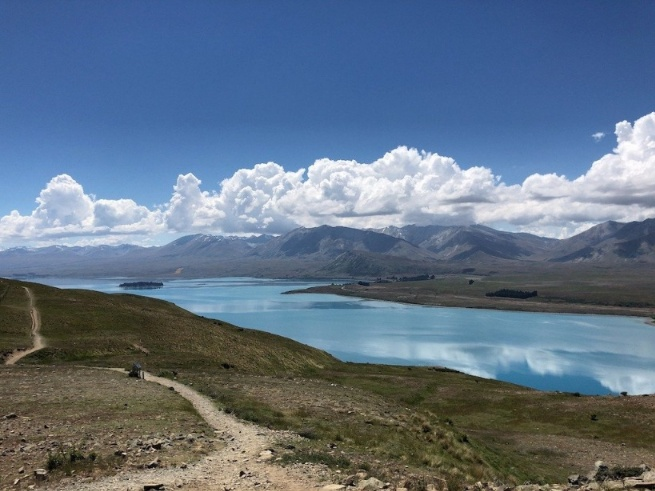

In [3]:
image = 'new-zealand-lake.jpg'
img = cv2.imread(image, cv2.IMREAD_COLOR)

# Display the image.
Image(filename=image, width='400') # IPython library syntax
# cv2.imshow(img) -- use imshow needs a canvas first

# 1. Addition / Subtraction:  Changes the Image Brightness
<b>Adding a constant value to the intensity of each pixel in an image will increase the brightness of the image. Likewise, subtracting a constant value from each pixel will decrease the brighhtness of an image.</b> We can use the **`add()`** and **`subtract()`** functions in OpenCV to perform these operations on images. 

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>
``` python
dst = cv2.add(src1, src2[, dst[, mask[, dtype]]])

```
`dst`: Output image of the same size and depth as `src1` and `src2`.

The function has **2 required arguments**:

1. `src1`: first input array or a scalar. ("scalar" is a single constant value that can be added to all pixel values of an image).
2. `src2`: second input array of same size and the same type as src1, or a scalar.

The function has **2 optional arguments**:
1. `mask`: optional operation mask - 8-bit single channel array, that specifies elements of the output array to be changed.
2. `dtype`: optional depth of the output array.

### <font color="green">OpenCV Documentation</font>


[**`add()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga10ac1bfb180e2cfda1701d06c24fdbd6)
[**`subtract()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gaa0f00d98b4b5edeaeb7b8333b2de353b)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Adjust the brightness of an image<font/>

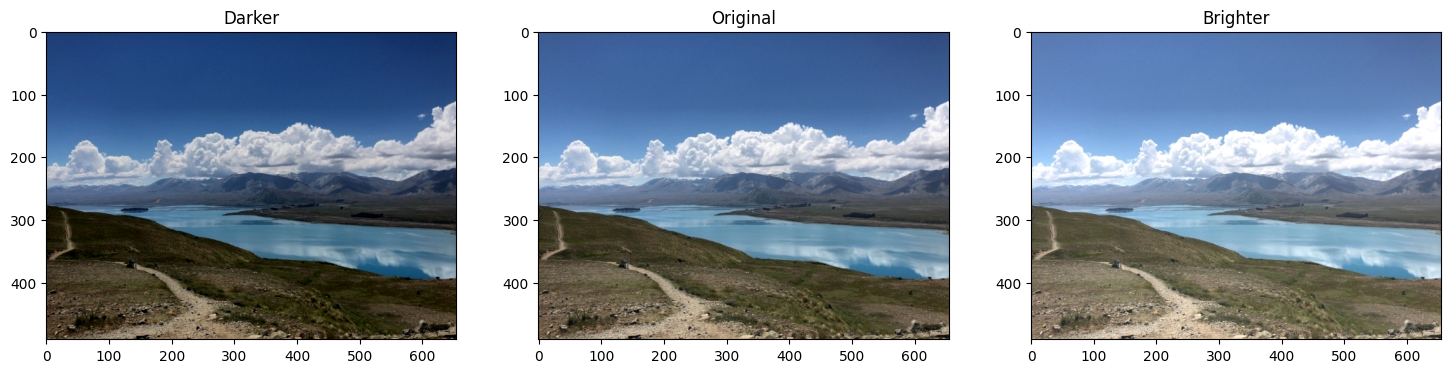

In [4]:
# Create a matrix with constant intensity.
"""
1) np.ones: create a matrix filled with 1, then * 30 means, the matrix will be filled with 30
2) dtype = 'uint8': datatype is set to unsigned 8-bit integer
"""
matrix = np.ones(img.shape, dtype = 'uint8') * 30 # this matrix is created based on the shape of the image

# Create brighter and darker images.
img_brighter = cv2.add(img, matrix)
img_darker   = cv2.subtract(img, matrix)

# Display the images
plt.figure(figsize = [18,5])
"""
subplot(131): 131 -- 1 row of subplots, 3 cols of subplots, the 1st subplot
subplot(132): 132 -- 1 row of subplots, 3 cols of subplots, the 2nd subplot
"""
plt.subplot(131); plt.imshow(img_darker[:, :, ::-1]);   plt.title('Darker')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);          plt.title('Original')
plt.subplot(133); plt.imshow(img_brighter[:, :, ::-1]); plt.title('Brighter');

# 2. Multiplication: Changes the Image Contrast
Multiplying the intensity values of an image by a constant value (greater or less than 1) will change the contrast of the image. Contrast is defined by the difference in the intensity values within an image. Consider the blue lake and the darker foreground in the image. Let's say the intensity of the lake is 150 and that of the foreground is 100. We perceive the difference between these two values as a measure of the contrast in the image. In this case, the difference is 50. Multiplying each by a factor of 1.5 would result in 225 for the lake and 150 for the foreground. The resulting difference after this multiplication is now 75 which has a higher contrast compared to the original image. <b>Multiplying by a factor less than one results in a lower contrast image. Vice versa, multiply by a factor >1 results in higher contrast</b>

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>
``` python
dst = cv2.multiply(src1, src2[, dst[, scale[, dtype]]])
```
`dst`: Output image of the same size and depth as `src1` and `src2`.

The function has **2 required arguments**:

1. `src1`: first input array.
2. `src2`: second input array of the same size and the same type as src1, or a scalar.

The function has **2 optional arguments**:
1. `scale`: optional scale factor.
2. `dtype`: optional depth of the output array.

### <font color="green">OpenCV Documentation</font>


[**`multiply()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga979d898a58d7f61c53003e162e7ad89f)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Modify the image contrast<font/> 

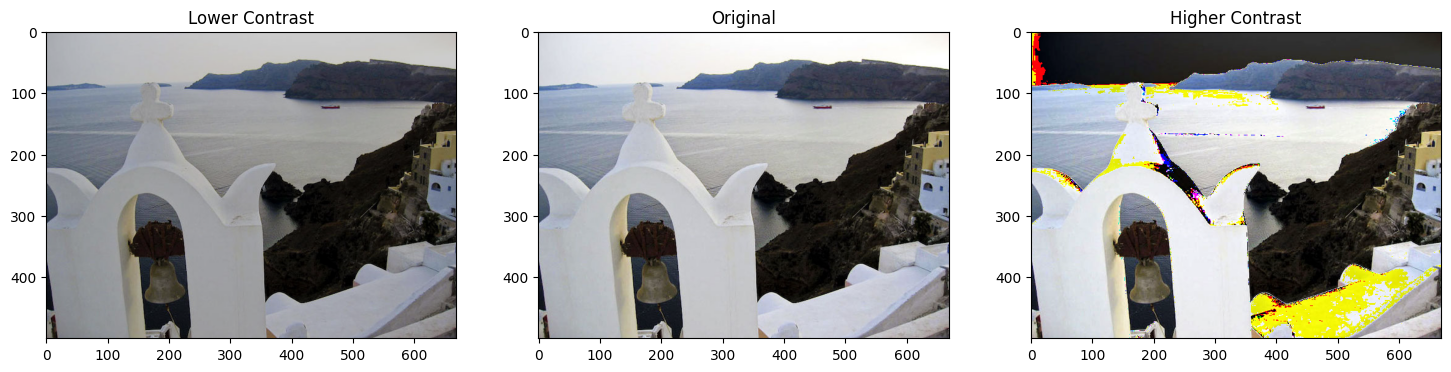

In [9]:
# Create matrices with a constant scale factor.
matrix1 = np.ones(img.shape) * 0.8
matrix2 = np.ones(img.shape) * 1.2

# Create lower and higher contrast images.
"""
1) uint8: Unsigned 8-bit integer, uint8 type represents integers from 0 to 255, which is typically how pixel values are stored in images.
   8 bits mean the number can range from 2^8 = 256 values (from 0 to 255).
   
   After performing certain operations like multiplying or adjusting pixel values, the resulting array may contain floating-point values or integers 
   beyond this range. Converting back to uint8 ensures that the pixel values are clamped to this valid range for displaying or storing the image.

2) np.float64: a NumPy function that converts the data type of img to 64-bit floating point numbers. float64 represents numbers with much more precision
   than uint8, allowing the multiplication process to handle intermediate values that could be fractional or exceed the range [0, 255]. Then it will
   be converted back to uint8 to fit within the valid range for image representation.
"""
img_lower  = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher = np.uint8(cv2.multiply(np.float64(img), matrix2))

# Display the images.
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);        plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast');

### <font style="color:rgb(50,120,230)">What happened?</font>
Notice that the high contrast image above has some strange colors in the clouds. When the original image was multiplied by the scale factor, some pixel intensity values exceeded 255. So when those floating-point values were converted to 8-bit unsigned integers using `np.uint8()`, an overflow condition occurred and the conversion to `uint8` wraps the values back to 0. For example, `np.uint8(265.2)`(# uint8 is range from 0-255) converts the floating point value of 265.2 to 9 (# 265 % 256 = 9). You can verify this with the following command: `print(np.uint8(265.2))`

So, how can we overcome this?

### <font style="color:rgb(50,120,230)">Handling Overflow using np.clip()</font>
The overflow condition can be handled by using the **`np.clip()`** function to clip the multiplied values to a specified range prior to converting to **`uint8`**.

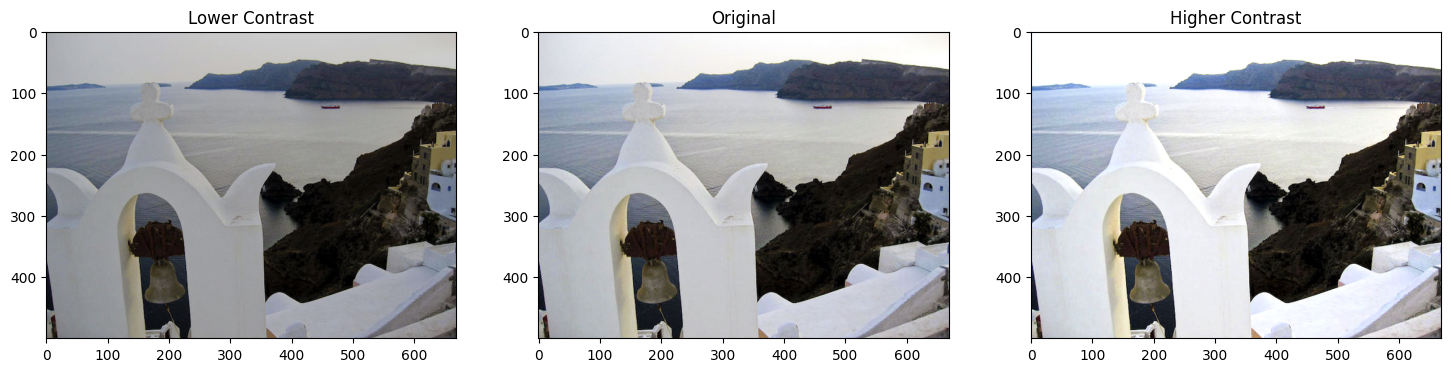

In [10]:
# Create matrices with a constant scale factor.
matrix1 = np.ones(img.shape) * 0.8
matrix2 = np.ones(img.shape) * 1.2

# Create lower and higher contrast images.
img_lower   = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix2) , 0, 255))

# Display the images.
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);        plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast');

### <font style="color:rgb(50,120,230)">Using the scale option</font>

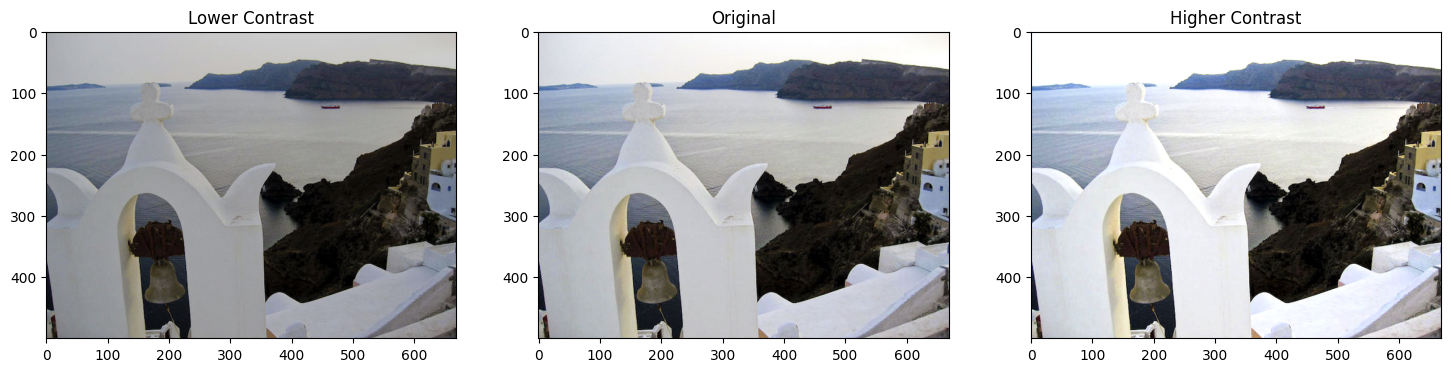

In [11]:
# Create matrices with a constant scale factor.
matrix_ones = np.ones(img.shape, dtype = 'float64')

# Create lower and higher contrast images.
img_lower   = np.uint8(cv2.multiply(np.float64(img), matrix_ones, scale = 0.8))
img_higher  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix_ones, scale = 1.2) , 0, 255))

# Display the images.
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);        plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast');

# 3. Exercise
Please complete the code in the cell below.

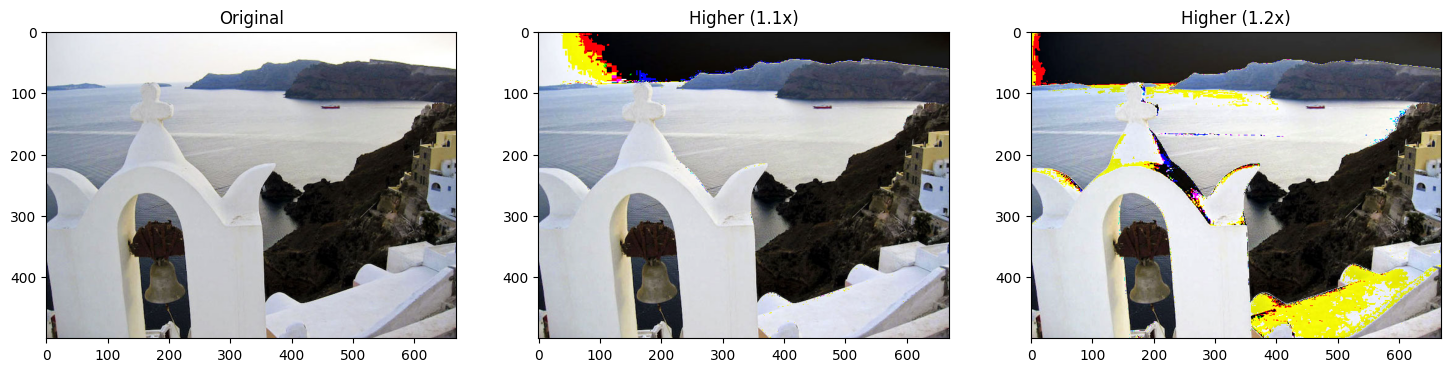

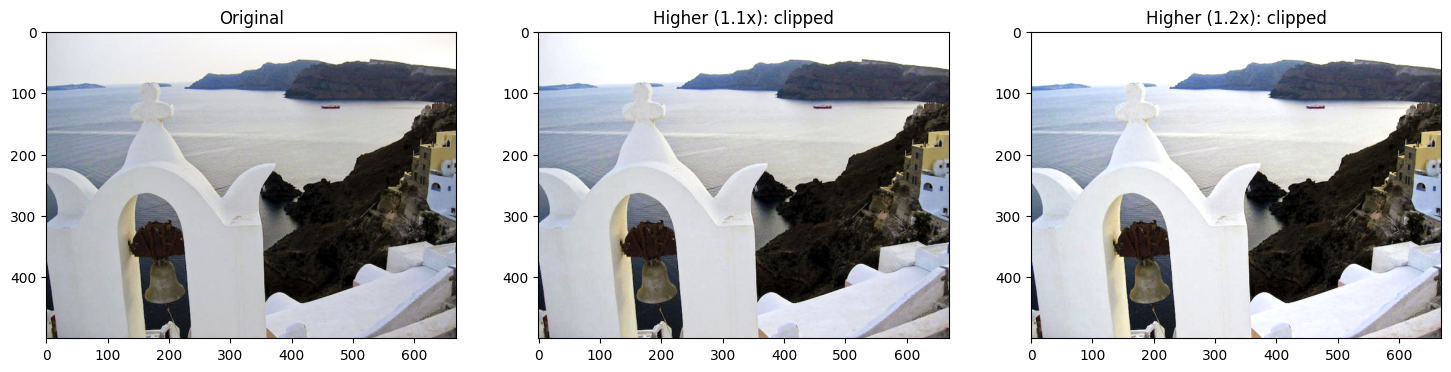

In [12]:
# Read the image ('Santorini.jpg')
image = 'Santorini.jpg'
img = cv2.imread(image, cv2.IMREAD_COLOR)

# Create a matrix of ones (with data type float64)
matrix_ones = np.ones(img.shape, dtype='float64');

# Create two higher contrast images using the 'scale' option with factors of 1.1 and 1.2 (without overflow fix)
# YOUR CODE HERE
img_higher1  = np.uint8(cv2.multiply(np.float64(img), matrix_ones, scale=1.1))
img_higher2  = np.uint8(cv2.multiply(np.float64(img), matrix_ones, scale=1.2))

# Display the images (original, higher (1.1x) , high (1.2x))
# UNCOMMENT the lines below.
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img[:, :, ::-1]);         plt.title('Original')
plt.subplot(132); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher (1.1x)')
plt.subplot(133); plt.imshow(img_higher2[:, :, ::-1]); plt.title('Higher (1.2x)');

# Create higher contrast images using scale factors of 1.1 and 1.2 (using np.clip() to clip high values to 255)
# YOUR CODE HERE
img_higher1  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix_ones, scale=1.1), 0, 255))
img_higher2  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix_ones, scale=1.2), 0, 255))

# Display the images (original, higher (1.1x) clipped , high (1.2x) clipped)
# UNCOMMENT the lines below.
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img[:, :, ::-1]);         plt.title('Original')
plt.subplot(132); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher (1.1x): clipped')
plt.subplot(133); plt.imshow(img_higher2[:, :, ::-1]); plt.title('Higher (1.2x): clipped');

Your results should look like this.
![Exercise-01](https://opencv.org/wp-content/uploads/2021/08/c0-m2-Exercise-01.png)